<a href="https://colab.research.google.com/github/MDaniyalTariq/Flower_Model/blob/main/Flower_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True ,cache_dir='.')

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
pathlib.PosixPath('datasets/flower_photos')

PosixPath('datasets/flower_photos')

In [12]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/18204150090_fb418bbddb.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7884440256_91c033732d.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3954167682_128398bf79_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/17466568484_9128287148.jpg'),
 PosixPath('datasets/flower_photos/dandelion/9029297232_de50698e2f_n.jpg')]

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [14]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')]

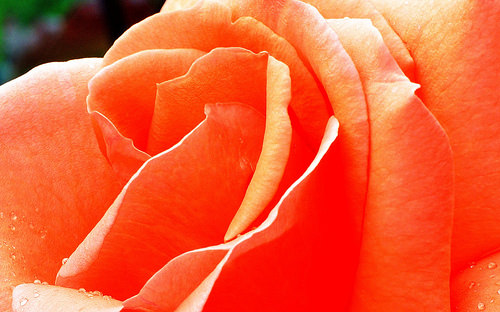

In [15]:
PIL.Image.open(str(roses[1]))

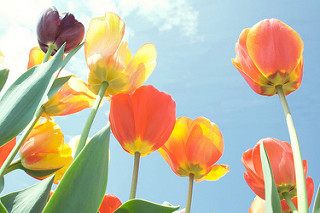

In [16]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [17]:
flower_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    }

In [18]:
flower_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
    }

In [19]:
flower_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/5156037859_1673720a11_m.jpg'),
 PosixPath('datasets/flower_photos/roses/7316409504_7cf3707f8a_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6158504080_b844a9ae05.jpg')]

In [20]:
str(flower_images_dict['roses'][0])

'datasets/flower_photos/roses/12238827553_cf427bfd51_n.jpg'

In [21]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(254, 320, 3)

In [17]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [22]:
X,y=[],[]
for flower_name, images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [26]:
X=np.array(X)
y=np.array(y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [29]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [24]:
num_classes=5
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.3364 - loss: 1.7114
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5596 - loss: 1.0905
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6573 - loss: 0.9178
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7387 - loss: 0.7184
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.8281 - loss: 0.4896
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9063 - loss: 0.2975
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9393 - loss: 0.2116
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9621 - loss: 0.1263
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9834 - loss: 0.0687
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.9793 - loss: 0.0690
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9889 - loss: 0.0759
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 349ms/step - accuracy: 0.2383 - loss: 1.6095


[1.6086387634277344, 0.23856209218502045]

In [26]:
predictions=model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step


array([[-10.856801  ,   5.5644784 ,   8.745667  , -10.987019  ,
         -9.68574   ],
       [ -6.9300966 ,  -9.561783  ,   9.138283  , -15.808209  ,
         -2.286701  ],
       [ -3.8088253 ,  -5.6831765 ,  12.47478   , -17.789047  ,
        -12.995831  ],
       ...,
       [  4.3708143 , -23.29693   ,  -6.0616355 ,  19.849657  ,
         -4.091958  ],
       [  2.2031472 ,  -4.211205  ,  -0.49131963,  -9.892906  ,
          3.5119739 ],
       [-15.304449  , -25.454718  ,  -5.122105  ,  23.912588  ,
          2.8570795 ]], dtype=float32)

In [27]:
score=tf.nn.softmax(predictions[0])
np.argmax(score)

2

In [28]:
y_test[0]

1

In [31]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


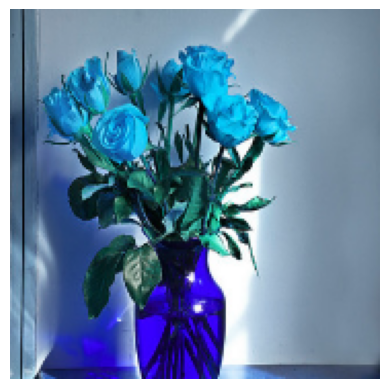

In [32]:
plt.axis("off")
plt.imshow(X[0])

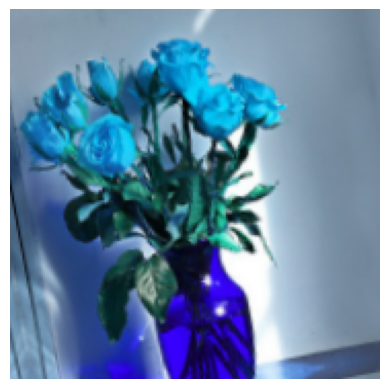

In [33]:
plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [32]:

num_classes = 5
model=Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.3827 - loss: 1.4676
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.5863 - loss: 1.0458
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.6264 - loss: 0.9447
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6468 - loss: 0.9103
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6749 - loss: 0.8449
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6791 - loss: 0.8131
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6912 - loss: 0.7688
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7377 - loss: 0.6927
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7299 - loss: 0.6933
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7675 - loss: 0.6193
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7549 - loss: 0.6333
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy:

In [33]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 499ms/step - accuracy: 0.7070 - loss: 1.1603


[1.165898323059082, 0.7047930359840393]